# Minecraft Playtime Analysis
_Nelli Kim, Leen Zeidan, Adrian Bartolome, Tiffany Huang_

## Introduction

Minecraft, since its release, has been a worldwide sensation, amassing over 173.29 million monthly active players (reference). Its open-world sandbox nature allows players to engage in various activities such as building, crafting, exploring, and survival. The game’s flexibility, combined with its engaging and immersive environment, has made it one of the best-selling video games of all time. Players can join multiplayer servers to collaborate or compete with others, while modders have further expanded the game’s possibilities, creating custom content that continues to attract new and returning players alike.
    
As Minecraft continues to grow in popularity, the player behaviors, in-game patterns, and interactions within the game have become subjects of interest for both researchers and developers. Understanding these patterns can provide valuable insights into player preferences, the impact of updates, and community trends. This project aims to answer the following question: Our goal is to predict which demographic groups (based on age) contribute the highest playtime in Minecraft, using played_hours as the response variable. This analysis will help identify target groups for future research or marketing efforts, particularly focusing on young males as a hypothesized high-playtime group.


Our response variable is played_hours, which we believe is affected by the 4 explanatory variables (experience,subscribe,gender,age) shown in the tibble, however, we will focus primarily on age and experience. The reason for this is that we believe that Minecraft appeals to a certain demographic and is more popular amongst young people in particular. Age is a critical demographic factor often associated with gaming habits. Younger players (e.g., 11–20 years) may have more leisure time, making them more likely to contribute high playtime. Research conducted by the U.S. Bureau of Labor Statistics in 2023 shows that individuals aged 15 to 19 spend an average of 98.4 minutes per day on gaming and computer use for leisure. This average decreases with age, with those aged 20 to 24 spending 70.8 minutes, and individuals aged 25 to 34 spending 37.2 minutes daily (Clement, 2024). This trend indicates that younger age groups tend to have more leisure time available for gaming activities. Older age groups may exhibit different gaming patterns, such as shorter sessions due to work or family commitments.cHence, we predict that age and gender would be the most distinctive feature of new participants in the research.  In order to know if our predictions are correct, we can produce different visualizations for the 2 explanatory variables and detect a relationship. The group with the highest play time would be targeted. To answer our research question, we will explore some of the relationships between each predictor and played_hours using some visualizations.



## Methods & Results

The first (players) dataset includes details about demographics of players (9 variables):

-experience (): Amateur, Beginner, Regular, Pro (This variable is categorical and takes on 4 different levels. It is ordinal since Veteran>Pro>Regular>Beginner>Amateur in terms of expertise with the game. We forecast that this data conversion may be helpful for later visualization)

-Subscribe (): True or False (depending on whether the player is subscribed) (This variable is categorical and takes on 2 levels)

-hashed_email()

-played_hours (): total number of hours played for each corresponding player (this is a continuous variable, and precision is important for play time hence the dbl format is appropriate)

-gender (): Male, Female, Two-spirited, Non-binary, Prefer not to say, Other (This variable is categorical and takes on 6 different levels)

-age (in yrs) () (This variable takes on integers as the data set provides age in years, so we will convert it to an integer)

-individual_id ()

-organization_name ()

Note: these variable names have the janitor clean_names function applied to them
we will omit individual_id and organization_name since they are not helpful for our analysis. hashed_email column is not needed for the analysis we're conducting, however, it could help consolidate both data sets and bind the columns by linking each player with its corresponding play time (start time and end time). We don't forecast needing this but can see that it could be helpful if we need a more specific account of how sessions change over time for each player (e.g. time series). 
Hence, we will only need the players data set for now and will select the 5 remaining variables
The second dataset (sessions) details the beginning and end time for each individual’s Hashed email and their corresponding sessions (5 variables): hashedEmail (): This is a character vector representing a hashed version of the email address. It makes each player's email anonymous

-start_time (): This is a character vector that stores the start time of an event or session in the format DD/MM/YYYY HH:MM. This column represents when the event begins.

-end_time (): Similar to start_time, this is a character vector that stores the end time of an event or session in the same date-time format (DD/MM/YYYY HH:MM).

-original_start_time (): This is a double (numeric) vector, where each value represents the start time in milliseconds. This is the numeric equivalent of start_time used for easier computational manipulation.

-original_end_time (): Like original_start_time, this is a double (numeric) vector representing the end time as milliseconds. It’s the numeric equivalent of end_time.




In [1]:

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
     

players <- read_csv("https://raw.githubusercontent.com/nelka-kim/plaicraft_project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/nelka-kim/plaicraft_project/refs/heads/main/sessions.csv")
head(players)
head(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Data Wrangling
We imported two datasets containing player details and session logs. Data wrangling was then performed to clean and merge the data, ensuring relevant variables such as age, total_played_hours, and experience were included.
We started off with ensuring no repeated data (hashedEmail) to ensure that every player was only counted once.



In [2]:

players_summarized <- players |>
    group_by(hashedEmail) |>
    summarize(total_played_hours = sum(played_hours, na.rm = TRUE))

median_df <- left_join(players, players_summarized, join_by(hashedEmail))

# i did this in case if there are any repeated emails but there were not so idk if i should delete the line now...
# lowkey shows more work

players_final <- select(median_df, hashedEmail, total_played_hours, age, experience)
players_final

hashedEmail,total_played_hours,age,experience
<chr>,<dbl>,<dbl>,<chr>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,9,Pro
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,17,Veteran
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,17,Veteran
⋮,⋮,⋮,⋮
d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,17,Amateur
f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,17,Amateur
d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,91,Pro


Given each hashedEmail only showed once, we'll proceed with selecting a sample of 100 people from the population of PLAICraft players to conduct the exporatory data analysis on.

In [14]:

set.seed(123)
players_selected <- players_final |>
    select(age, experience, total_played_hours)

players_100 <- players_selected |>
    sample_n(100)
players_100

age,experience,total_played_hours
<dbl>,<chr>,<dbl>
19,Regular,178.2
17,Amateur,0.4
22,Amateur,0.2
⋮,⋮,⋮
18,Veteran,0.1
20,Amateur,0.0
17,Veteran,0.0


Now that we created a tibble with the selected columns we need, we will focus on creating visualizations for our data, beginning with a scatter plot examining the relationship between age and number of hours played. 

### Exploratory Data Visualization

#### Figure 1: Scatter Plot - Age vs. Total Played Hours

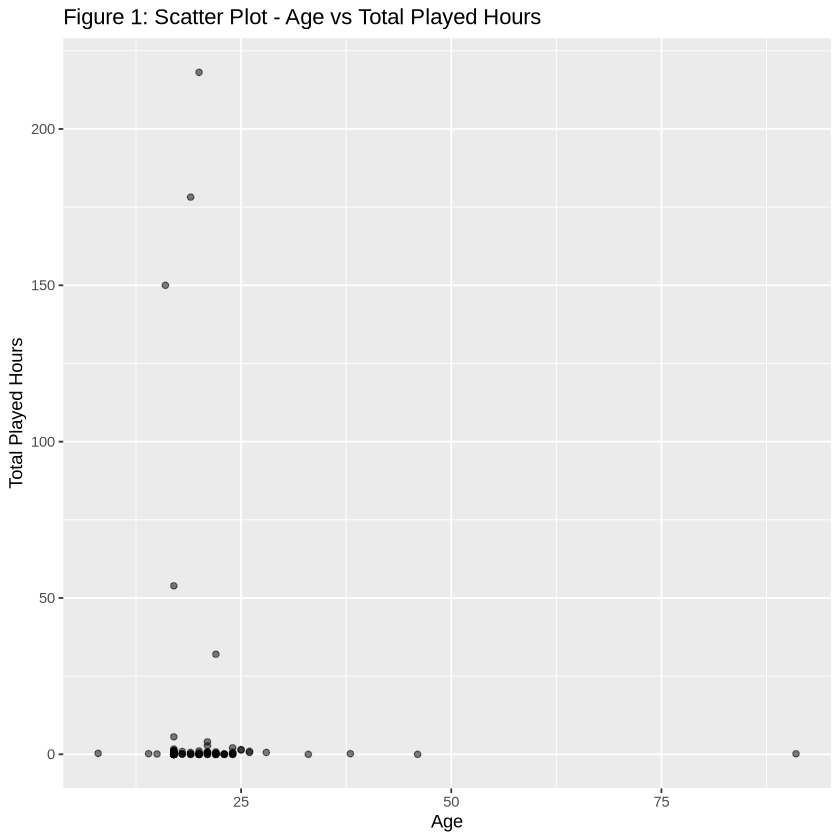

In [15]:

library(ggplot2)
ggplot(players_100, aes(x = age, y = total_played_hours)) +
  geom_point(alpha=0.5) +
  labs(
    title = "Figure 1: Scatter Plot - Age vs Total Played Hours",
    x = "Age",
    y = "Total Played Hours"
  )


Although we can see the clustered points of the data, in order to see examine the specific ages more clearly we will create a histogram with short binwidth.

#### Figure 2: Histogram - Age Distribution

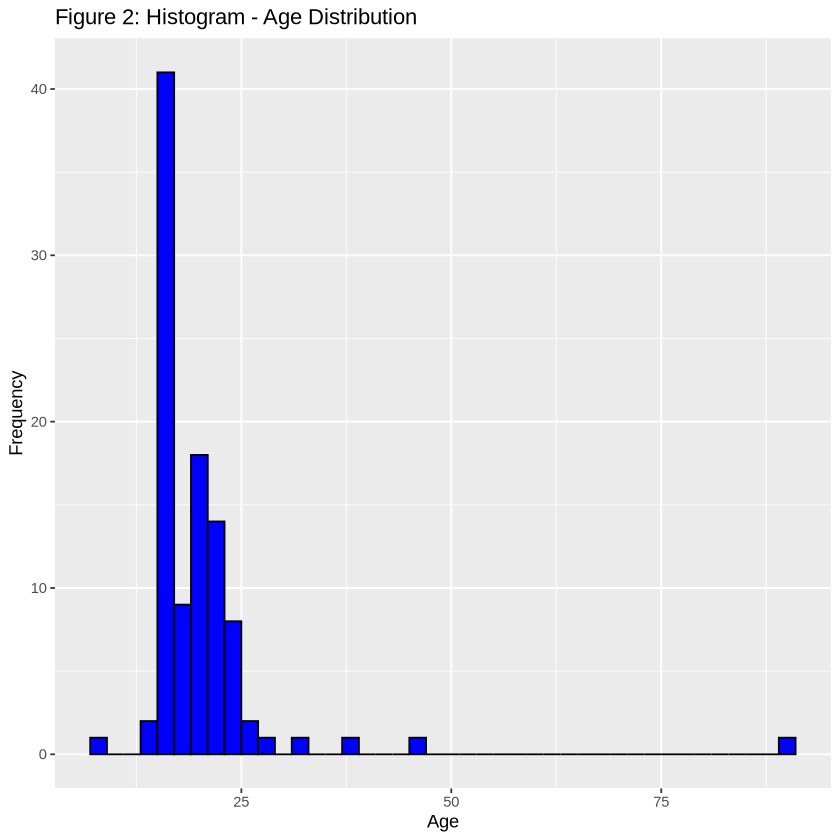

In [18]:

ggplot(players_100, aes(x = age)) +
  geom_histogram(binwidth = 2, fill = "blue", color = "black") +
  labs(
    title = "Figure 2: Histogram - Age Distribution",
    x = "Age",
    y = "Frequency"
  )


Although the above histogram gives us insight about the peak in data, it is difficult to see what specific ages mostly play minecraft in the data set. So, we will create a bar graph with age bins since it would be more meaningful for recruiting efforts (given it is more plausible to find players within an age group then a specific integer.)

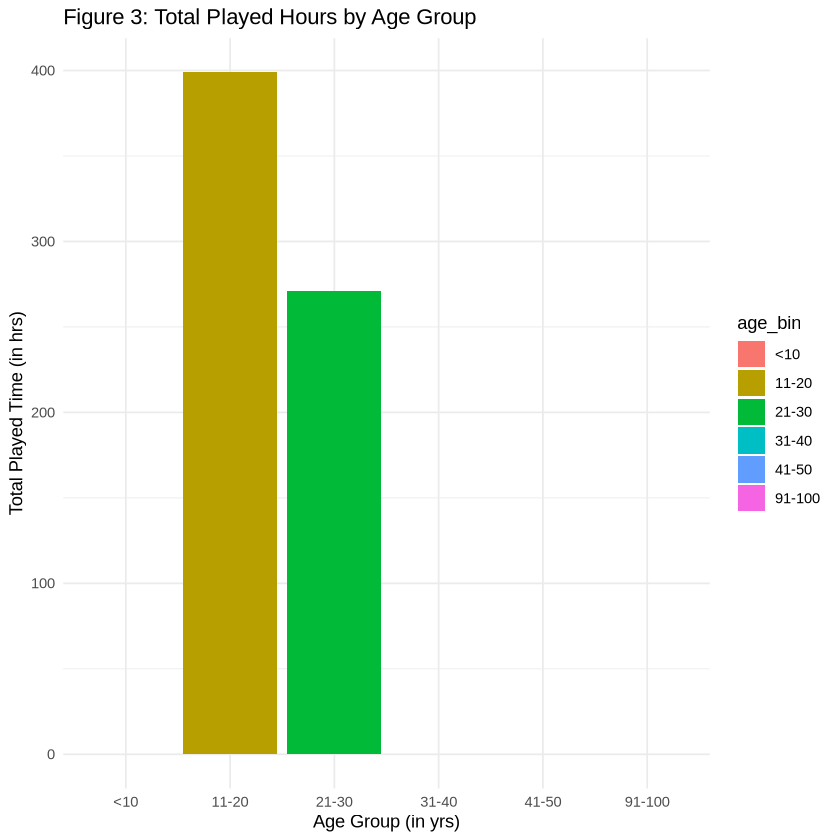

In [23]:

players_binned <- players_100 |>
  mutate(age_bin = cut(age, breaks = seq(0, 100, by = 10), right = FALSE, labels = c("<10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"))) %>%
  group_by(age_bin)

# Create the bar chart
ggplot(players_binned, aes(x = age_bin, y = total_played_hours, fill = age_bin)) +
  geom_bar(stat = "identity") +
  labs(title = "Figure 3: Total Played Hours by Age Group", x = "Age Group (in yrs)", y = "Total Played Time (in hrs)") +
  theme_minimal()


As we can see from the above bar graph, the age groups of most of the players are 11-20 and 21-30. This supports our predictions of younger people playing more minecraft than older people. 

### Data Analysis

We used a K-Nearest Neighbors (KNN) regression model to predict total play hours (`total_played_hours`) based on age (`age`). The optimal number of neighbors was determined using cross-validation.


In [24]:

set.seed(123)
players_split <- initial_split(players_final, prop = 0.75, strata = total_played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)


In [25]:

set.seed(123)
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(total_played_hours ~ age, data = players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())
players_recipe

players_vfold <- vfold_cv(players_training, v = 4, strata = total_played_hours)

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)

players_workflow
     



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [26]:

set.seed(123)
gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 7))

players_results <- players_workflow |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>

# added filter
    filter(.metric == "rmse")

players_results
     

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,34.96602,4,11.368616,Preprocessor1_Model01
8,rmse,standard,29.30318,4,6.751021,Preprocessor1_Model02
15,rmse,standard,28.01080,4,6.244736,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
85,rmse,standard,28.27633,4,6.167207,Preprocessor1_Model13
92,rmse,standard,28.24833,4,6.208501,Preprocessor1_Model14
99,rmse,standard,28.21565,4,6.272592,Preprocessor1_Model15


In [27]:

set.seed(123)

min_rmspe <- players_results |>
    filter(mean == min(mean))
min_rmspe
     

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
15,rmse,standard,28.0108,4,6.244736,Preprocessor1_Model03


In [11]:

set.seed(123)

k_min <- min_rmspe |>
         pull(neighbors)

best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(best_spec) |>
         fit(data = players_training)

players_summary <- best_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) |>
          metrics(truth = total_played_hours, estimate = .pred)
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,22.788240983
rsq,standard,0.008645417
mae,standard,7.092533333


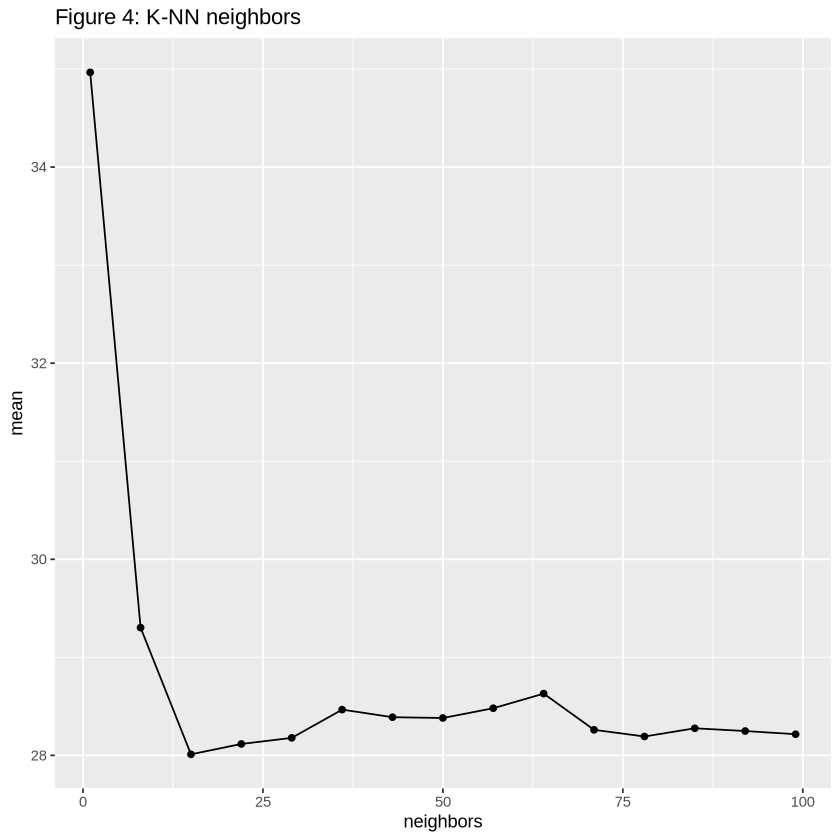

In [28]:
#verifying that lowest is indeed k = 15

test <- players_results |>
    ggplot(aes(x = neighbors, y = mean)) +  
    geom_point() +
    geom_line()+
labs(title = "Figure 4: K-NN neighbors")

test
     

In Figure 3, we can see that the elbow point is at K=15. This is the optimal point since after that, the RMSE begins to increase. We selected the K-Nearest Neighbors (KNN) regression model because it does not rely on strict assumptions about the relationship between variables, making it ideal for capturing potential non-linear patterns between age and total_played_hours. KNN predicts values based on the average of the closest k data points, which allows it to adapt to variations in the data without enforcing a rigid structure. This flexibility was important given the variability in playtime observed across age groups, as some players might exhibit drastically different gaming behaviors that do not fit a simple trend. Using cross-validation, we determined the optimal k to ensure the model balanced accuracy and generalizability.

We avoided using linear regression because it assumes a direct, proportional relationship between age and total_played_hours. Our exploratory analysis indicated that this assumption might not hold, as younger players demonstrated significant variability in playtime that a linear model would struggle to capture. Additionally, the presence of outliers in gaming data, such as players with extremely high or low playtime, could heavily influence a linear regression model, leading to less reliable results. By contrast, KNN’s local averaging makes it more robust in handling these outliers and better suited to reflect the underlying patterns in the data.

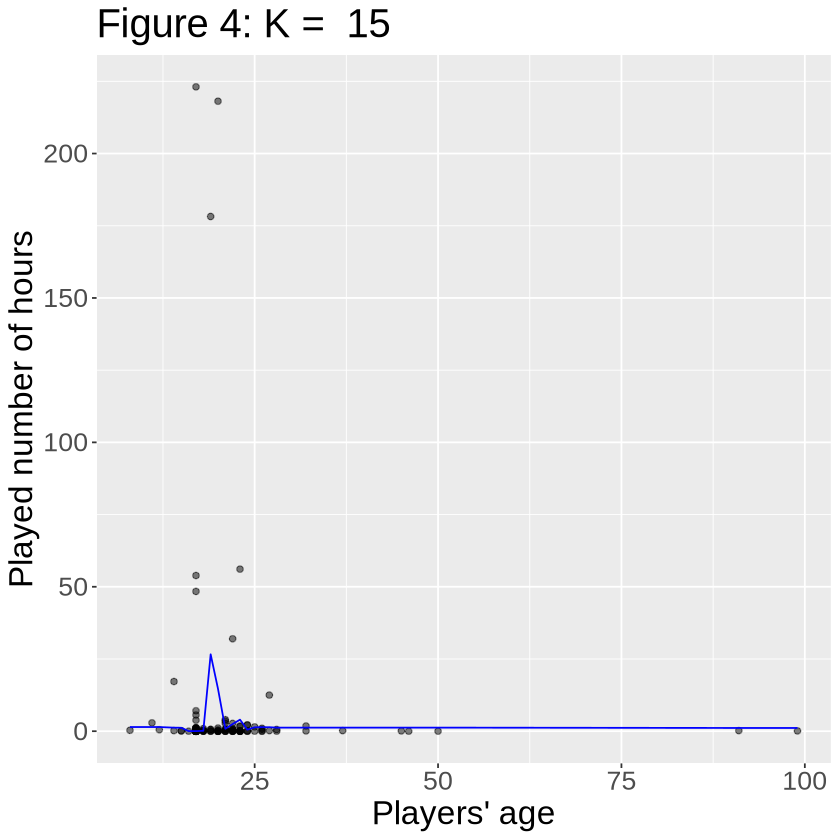

In [29]:

options(repr.plot.width = 7, repr.plot.height = 7)

players_preds <- best_fit|>
    predict(players_training) |>
    bind_cols(players_training)

players_plot <- players_preds |>
    ggplot(aes(x=age, y=total_played_hours))+
    geom_point(alpha = 0.5)+
    geom_line(data = players_preds,
            mapping = aes(x = age, y = .pred),
            color = "blue") +
    xlab("Players' age")+
    ylab("Played number of hours")+
    ggtitle(paste("Figure 4: K = ", k_min)) +
    theme(text = element_text(size = 20))

players_plot

## Discussion
As seen in Figure 1, most data points are densely clustered around players aged 15–25, reinforcing that this demographic makes up the majority of Minecraft players. The scatterplot highlights a few outliers with exceptionally high playtime, further emphasizing the variability in gaming habits among younger players. Figure 2 provides additional detail, showing that younger players dominate the dataset, with the highest frequency of players falling under 25 years of age. The distribution thins out as age increases, indicating a steep decline in player participation among older age groups. Figure 3 further confirms this trend, showing that total playtime is concentrated in the 11–20 and 21–30 age brackets. These age groups account for the bulk of total playtime, while older age groups contribute only minimally. Collectively, these figures underline the strong dominance of younger demographics in Minecraft, both in terms of player count and playtime, with clear evidence of decreasing engagement as age increases. 

Something important to note about Figure 1 is while most data points are clustered around the 15–25 age range, there are several outliers representing players with high playtime, often exceeding 200 hours. These outliers are significant because they suggest the presence of highly engaged individuals who may be outliers in terms of time commitment compared to the broader player base. These players could represent specific groups, such as professional gamers, highly dedicated fans, or players who leverage the game for content creation or social interaction.

Outliers can skew averages and predictions in analyses, making it essential to account for their influence when interpreting results. For instance, the KNN regression model may be influenced by these extreme values, as seen in Figure 4, where the variability in predictions is sharper for younger players. These outliers highlight the need to complement age-based analysis with additional variables, such as experience level, gaming purpose, or subscription status, to better understand what drives such high engagement levels in certain players. While these outliers may represent a small percentage of the dataset, they offer insights into unique player behaviors that could be valuable for future research or targeted engagement strategies.

The K-Nearest Neighbors (KNN) regression model provided useful insights into the relationship between age and playtime. However, the model demonstrated low explanatory power when using age alone as a predictor, suggesting that other factors play a significant role in determining playtime. For instance, while age captures broad trends, it does not account for individual differences in gaming preferences, available leisure time, or subscription status. This limitation highlights the importance of incorporating additional predictors such as gaming experience, subscription type, and gender to improve the model’s accuracy and predictive power. Despite these constraints, the KNN model was able to reinforce the general trend observed in the data: younger players tend to engage more with Minecraft than older ones.

The results align with our initial hypothesis that younger demographics contribute the most to Minecraft playtime. This finding is consistent with prior research indicating that younger age groups generally have more leisure time to dedicate to gaming. For instance, data from the U.S. Bureau of Labor Statistics suggests that individuals aged 15–19 spend significantly more time on gaming compared to older age groups. These findings validate the assumption that Minecraft primarily appeals to a younger audience, with engagement tapering off as players age. The data also supports the observation that life commitments, such as work or family responsibilities, likely reduce the amount of time older players can dedicate to gaming.


The insights from this analysis have several practical implications. For marketing efforts, understanding that younger demographics are the primary contributors to playtime can help tailor campaigns to this audience. Advertising strategies could focus on platforms and content that resonate with teenagers and young adults, emphasizing features that appeal to their preferences. Additionally, game developers can leverage these insights to design updates or features that align with the interests of high-playtime age groups, such as introducing content targeted at younger players or enhancing social interaction elements within the game. These strategies could boost player engagement and retention among the key demographic.


This study raises several questions for further exploration. One important area to investigate is the influence of experience levels and subscription status on playtime. For example, do veteran players engage more consistently than beginners, or does subscribing to premium features increase playtime? Another intriguing avenue is the role of gender in shaping gaming behaviors. Understanding whether male and female players exhibit different patterns of engagement could provide more nuanced insights for targeted strategies. Finally, expanding the analysis to include multiple variables, such as a combination of age, gender, experience, and subscription status, could enable the use of more sophisticated machine learning models. These models could uncover complex relationships and improve the accuracy of playtime predictions, ultimately providing a deeper understanding of player behavior in Minecraft.


## References

Clement, J. (2024). U.S. Bureau of Labor Statistics: Gaming habits across age groups.
